# Ensemble Learning
Ensemble Learning (EL) is a powerful way to improve the performance of your model. It usually pays off to apply ensemble learning over and above various models you might be building. Time and again, people have used ensemble models in competitions like Kaggle and benefited from it. EL is the art of combining diverse set of individual models (learners) together to improvise on the stability and predictive power of the model.

## Methods
Ensemble methods are meta-algorithms that combine several machine learning techniques into one predictive model in order to decrease variance (bagging), bias (boosting), or improve predictions (stacking).
Ensemble methods can be divided into two groups:
* sequential ensemble methods where the base learners are generated sequentially (e.g. AdaBoost).
The basic motivation of sequential methods is to exploit the dependence between the base learners. The overall performance can be boosted by weighing previously mislabeled examples with higher weight.

* parallel ensemble methods where the base learners are generated in parallel (e.g. Random Forest). 
The basic motivation of parallel methods is to exploit independence between the base learners since the error can be reduced dramatically by averaging.

## Commonly used Ensemble learning techniques

1.   Bagging : Bagging tries to implement similar learners on small sample populations and then takes a mean of all the predictions. In generalized bagging, you can use different learners on different population.  As you can expect this helps us to reduce the variance error. ![Bagging](https://www.analyticsvidhya.com/wp-content/uploads/2015/07/bagging.png)

2.   Boosting : Boosting is an iterative technique which adjust the weight of an observation based on the last classification. If an observation was classified incorrectly, it tries to increase the weight of this observation and vice versa. Boosting in general decreases the bias error and builds strong predictive models. However, they may sometimes over fit on the training data. ![Boosting](https://www.analyticsvidhya.com/wp-content/uploads/2015/07/boosting.png)

3.   Stacking : This is a very interesting way of combining models. Here we use a learner to combine output from different learners. This can lead to decrease in either bias or variance error depending on the combining learner we use. ![Stacking](https://www.analyticsvidhya.com/wp-content/uploads/2015/07/stacking-297x300.png)

## Definition
Ensemble learning is a machine learning paradigm where multiple learners are trained to solve the same problem. In contrast
to ordinary machine learning approaches which try to learn one hypothesis from training data, ensemble methods try to
construct a set of hypotheses and combine them to use. [Zhi-Hua Zhou](https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/springerEBR09.pdf)

## REFERENCE
* https://www.analyticsvidhya.com/blog/2015/08/introduction-ensemble-learning/
* https://www.youtube.com/watch?v=X3Wbfb4M33w
* http://yann.lecun.com/exdb/mnist/

In [0]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Loading data
MNIST data with ImageClassifierData.

In [0]:
# data = pd.read_csv('https://query.data.world/s/42pzagdvihfnzqopixcqnn3alxkf6d')

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='datasets/')

# Convert sklearn 'datasets bunch' object to Pandas DataFrames
y = pd.Series(mnist.target).astype('int').astype('category')
X = pd.DataFrame(mnist.data)
data = X

In [6]:
# Change column-names in X to reflect that they are pixel values
num_images = data.shape[1]
data.columns = ['pixel_'+str(x) for x in range(num_images)]

display(data.shape)
display(data.head(5))

display(y.shape)
y.head(5)

(70000, 784)

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(70000,)

0    0
1    0
2    0
3    0
4    0
dtype: category
Categories (10, int64): [0, 1, 2, 3, ..., 6, 7, 8, 9]

## Frequency table

In [7]:
y.value_counts(normalize=True)

1    0.112529
7    0.104186
3    0.102014
2    0.099857
9    0.099400
0    0.098614
6    0.098229
8    0.097500
4    0.097486
5    0.090186
dtype: float64

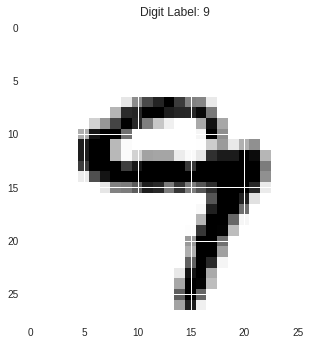

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# First row is first image
first_image = X.loc[54321,:]
first_label = y[54321]

# 784 columns correspond to 28x28 image
plottable_image = np.reshape(first_image.values, (28, 28))

# Plot the image
plt.imshow(plottable_image, cmap='gray_r')
plt.title('Digit Label: {}'.format(first_label))
plt.show()

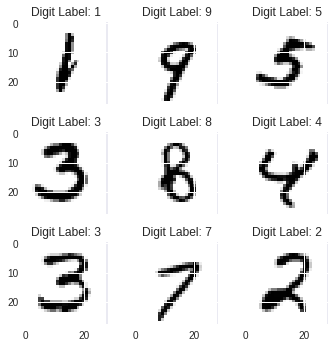

In [9]:
images_to_plot = 9

random_indices = np.random.randint(low = 0, high = y.shape[0] + 1, size = images_to_plot)

sample_images = X.loc[random_indices, :]
sample_labels = y.loc[random_indices]

plt.clf()
plt.style.use('seaborn-muted')

fig, axes = plt.subplots(3,3, 
                         figsize=(5,5),
                         sharex=True, sharey=True,
                         subplot_kw=dict(adjustable='box-forced', aspect='equal')) #https://stackoverflow.com/q/44703433/1870832

for i in range(images_to_plot):
    
    # axes (subplot) objects are stored in 2d array, accessed with axes[row,col]
    subplot_row = i//3 
    subplot_col = i%3  
    ax = axes[subplot_row, subplot_col]

    # plot image on subplot
    plottable_image = np.reshape(sample_images.iloc[i,:].values, (28,28))
    ax.imshow(plottable_image, cmap='gray_r')
    
    ax.set_title('Digit Label: {}'.format(sample_labels.iloc[i]))
    ax.set_xbound([0,28])

plt.tight_layout()
plt.show()

## Summary of data

In [10]:
X_values = pd.Series(X.values.ravel())
print(" min: {}, \n max: {}, \n mean: {}, \n median: {}, \n most common value: {}".format(X_values.min(), 
                                                                                          X_values.max(), 
                                                                                          X_values.mean(),
                                                                                          X_values.median(), 
                                                                                          X_values.value_counts().idxmax()))

 min: 0, 
 max: 255, 
 mean: 33.385964741253645, 
 median: 0.0, 
 most common value: 0


## Split data in trainning and test data

In [11]:
# df_x = data.iloc[:,1:]
# df_y = data.iloc[:,0]

df_x = X
df_y = y

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

display(df_x.shape)
display(df_y.shape)

display(x_train.shape)
display(y_train.shape)

display(x_test.shape)
display(y_test.shape)

(70000, 784)

(70000,)

(56000, 784)

(56000,)

(14000, 784)

(14000,)

## Decision Tree

In [12]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
dt.score(x_test,y_test)

0.8737142857142857

In [14]:
dt.score(x_train,y_train)

1.0

## Random Forest
Random Forest is an Ensemble of Descision Trees.

In [15]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
rf.score(x_test,y_test)

0.9573571428571429

In [17]:
rf.score(x_train,y_train)

0.9999285714285714

## Bagging 

In [18]:
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.5, max_features = 1.0, n_estimators = 20)
bg.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=20, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [19]:
bg.score(x_test,y_test)

0.9474285714285714

In [20]:
bg.score(x_train,y_train)

0.9939107142857143

## Boosting - Ada Boost

In [21]:
adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 5, learning_rate = 1)
adb.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=5, random_state=None)

In [22]:
adb.score(x_test,y_test)

0.8732857142857143

In [23]:
adb.score(x_train,y_train)

1.0

## Voting Classifier - Multiple Model Ensemble 

In [0]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(kernel = 'poly', degree = 2 )

In [0]:
evc = VotingClassifier( estimators= [('lr',lr),('dt',dt),('svm',svm)], voting = 'hard')

In [35]:
evc.fit(x_train.iloc[1:4000],y_train.iloc[1:4000])

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('dt', Decisio...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [36]:
evc.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9026428571428572

In [37]:
evc.score(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9094464285714285

## Running in GPU

In [38]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import tensorflow as tf


device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


# See https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

with tf.device('/gpu:0'):
  lr = LogisticRegression()
  dt = DecisionTreeClassifier()
  svm = SVC(kernel = 'poly', degree = 2 )
  evc = VotingClassifier( estimators= [('lr',lr),('dt',dt),('svm',svm)], voting = 'hard')
  evc.fit(x_train.iloc[1:4000],y_train.iloc[1:4000])
  evc.score(x_test, y_test)
  evc.score(x_train,y_train)


  

Found GPU at: /device:GPU:0


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [39]:
  evc.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9029285714285714

In [40]:
evc.score(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9095